Maps

In [165]:
import pandas as pd

# Read excel file into a DataFrame 
df = pd.read_csv('/Users/rishi/OneDrive - Michigan State University/20231124Draft4Ch3/Ecosystem_Scores.csv') 

# Define landcover and service column names  
landcovers = list(df.columns[1:])
services = list(df.iloc[0])

# Initialize scores dictionary
scores = {}

# Loop through each landcover
for landcover in landcovers:

  # Initialize nested dictionary  
  scores[landcover] = {}

  # Loop through each service  
  for i in range(len(services)):

    # Extract score and add to dictionary
    scores[landcover][services[i]] = df.loc[1,landcover]



# Load GAUL dataset
gaul = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015");

# Ecosystem service supply calculation

# Import libraries
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

# Section 1: Define study areas and land cover data


# Load land cover image  
lc = ee.Image("MODIS/006/MCD12Q1/2016")

# Section 2: Read ecosystem service scores
# Columns to keep
needed_cols = [
  ' Ecosystem Service / Function ',
  ' Mixed Forests Score ',
  ' Woody Savannas Score ', 
  ' Permanent Snow and Ice Score ',
  ' Permanent Wetlands Score ',
  ' Urban and Builtup Lands Score ',
  ' Greenness (NDVI) Score ',
  ' Water Bodies Score ',
  ' Barren Land Score ',
  ' Closed Shrublands Score ',
  ' Natural Vegetation Score ',
  ' Croplands Score ',
  ' Grasslands Score ',
  'Barren'
]

# Rename columns for dict creation
lc_scores_df = lc_scores_df.rename(columns={
  ' Ecosystem Service / Function ':'Landcover'
})


# Get landcover and service names
landcovers = list(df.columns[1:])    
services = list(df.iloc[0])  

# Populate scores dictionary
scores = {}

for landcover in landcovers:
    scores[landcover] = {} 
    for i in range(len(services)):
        scores[landcover][services[i]] = df.loc[1,landcover]
    
# Section 3: Define calculation function

def calculate_supply(feature):
    # Initialize empty dict
    supply = {}  

    # Create lc_scores dict  
    global lc_scores_df
    lc_scores = dict(zip(
        lc_scores_df['Landcover'],
        lc_scores_df.set_index('Landcover')  
    ))

    for landcover, scores in lc_scores.items():
        for service, score in scores.items():
            # Cast score to string  
            supply[service] = str(score)

    return supply






def calculate_supply(district):
    supply = {}
    

  # extract land cover data  
    for landcover, services in scores.items():
        for service, score in services.items():
            supply[service] = score
    return {
        district.id: supply
  }

# Use region 3 FeatureCollection
regions_fc = ee.FeatureCollection(
  metro_manila.merge(region_4).merge(region_3)  
)

regions_fc = regions_fc.map(lambda f: f.select(['id']))

In [16]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

# Section 1: Define study areas and land cover data

# Load land cover image  
lc = ee.Image("MODIS/006/MCD12Q1/2016")

# Section 2: Read ecosystem service scores

# Read excel file into a DataFrame 
df = pd.read_csv('/Users/rishi/OneDrive - Michigan State University/20231124Draft4Ch3/Ecosystem_Scores.csv') 

# Columns to keep
needed_cols = [' Ecosystem Service / Function ', ' Mixed Forests Score ', ' Woody Savannas Score ', 
               ' Permanent Snow and Ice Score ', ' Permanent Wetlands Score ', ' Urban and Builtup Lands Score ',
               ' Greenness (NDVI) Score ', ' Water Bodies Score ', ' Barren Land Score ', ' Closed Shrublands Score ',
               ' Natural Vegetation Score ', ' Croplands Score ', ' Grasslands Score ', 'Barren']

# Rename columns for dictionary creation
lc_scores_df = df[needed_cols].rename(columns={' Ecosystem Service / Function ': 'Landcover'})

# Get landcover and service names
landcovers = list(lc_scores_df.columns[1:])
services = list(lc_scores_df.iloc[0])

# Populate scores dictionary
scores = {}
for landcover in landcovers:
    scores[landcover] = {}
    for i in range(len(services)):
        scores[landcover][services[i]] = lc_scores_df.loc[1, landcover]

# Section 3: Define calculation function

def calculate_supply(feature):
    supply = {}

    # Create lc_scores dictionary  
    lc_scores = dict(zip(lc_scores_df['Landcover'], lc_scores_df.set_index('Landcover').to_dict(orient='index')))

    for landcover, scores in lc_scores.items():
        for service, score in scores.items():
            # Cast score to string
            supply[service] = str(score)

    return supply

# Section 4: Calculate and export results

# Use region 3 FeatureCollection
regions_fc = ee.FeatureCollection(
    metro_manila.merge(region_4).merge(region_3)
)

regions_fc = regions_fc.map(lambda f: f.select(['id']))

# Calculate results for each district
results = regions_fc.map(calculate_supply)

# Convert results to pandas DataFrame
results_df = pd.DataFrame(results.getInfo())

# Save the DataFrame to a CSV file
results_df.to_csv('ES_Results.csv', index=False)


NameError: name 'metro_manila' is not defined

In [1]:
import pandas as pd

# Read excel file
df = pd.read_csv('/Users/rishi/OneDrive - Michigan State University/4Chapter3Data') 

# List of land cover column names
landcover_cols = [col for col in df.columns if 'Normalized_' in col]

# Loop through each district 
for district in df['District'].unique():
    
    print(f'Data for {district}:')
    
    # Filter dataframe to current district
    df_district = df[df['District']==district]  

    # Loop through land cover columns
    for col in landcover_cols:

        # Print column name and normalized value 
        print(f'{col}: {df_district[col].values[0]}')
        
        


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv'

In [4]:
# List of land cover column names grouped by year  
landcover_cols = {'2001': [col for col in df.columns if 'Normalized_2001' in col],
                  '2005': [col for col in df.columns if 'Normalized_2005' in col],
                  '2010': [col for col in df.columns if 'Normalized_2010' in col],
                  '2015': [col for col in df.columns if 'Normalized_2015' in col],
                  '2020': [col for col in df.columns if 'Normalized_2020' in col]}

# Transpose data
df = df.set_index(['Parent Region','District'])

# Loop through years
for year, cols in landcover_cols.items():
    
    print(f'Data for year {year}:')
    
    # Transpose land cover columns for that year
    df_year = df[cols].T
    
    # Print transposed dataframe
    print(df_year)

Data for year 2001:
Parent Region                                      Cordillera Administrative region (CAR)  \
District                                                                             Abra   
Normalized_2001_Grasslands                                                       0.237326   
Normalized_2001_Croplands                                                        0.044572   
Normalized_2001_Urban and Built-up Lands                                         0.020174   
Normalized_2001_Barren                                                           0.056109   
Normalized_2001_Your Landcover Name for 17                                       0.000000   
Normalized_2001_Evergreen Broadleaf Forests                                      0.296180   
Normalized_2001_Deciduous Broadleaf Forests                                      0.436952   
Normalized_2001_Woody Savannas                                                   0.743177   
Normalized_2001_Savannas                          

In [19]:
# List of land cover columns  
landcovers = [col for col in df if 'Normalized_' in col]

 Ecosystem service scores
es_scores = {'Mixed Forests':80, 
             'Woody Savannas':76}
             
# Melt dataframe to long format             
df = df.melt(id_vars=['District'], value_vars=landcovers) 

# Pivot to have land covers as rows  
df = df.pivot_table(index='variable', 
                    columns='District', 
                    values='value', 
                    aggfunc='sum')

# Multiply by ES scores  
for district in df.columns:
    for es, score in es_scores.items():
        df[district] = df.index.map(es_scores) * df[district]
    
# Output  
print(df)

District                                     Abra  Albay  Apayao  Aurora  \
variable                                                                   
Normalized_ 2005Green Space per Inhabitant    NaN    NaN     NaN     NaN   
Normalized_ 2005NDMI                          NaN    NaN     NaN     NaN   
Normalized_ 2005NDVI                          NaN    NaN     NaN     NaN   
Normalized_ 2005Tree Canopy Cover             NaN    NaN     NaN     NaN   
Normalized_ 2010Green Space Per inhabitant    NaN    NaN     NaN     NaN   
...                                           ...    ...     ...     ...   
Normalized_2020_Your Landcover Name for 17    NaN    NaN     NaN     NaN   
Normalized_Area (sq km)                       NaN    NaN     NaN     NaN   
Normalized_Pop_2000                           NaN    NaN     NaN     NaN   
Normalized_Pop_2010                           NaN    NaN     NaN     NaN   
Normalized_Pop_2015                           NaN    NaN     NaN     NaN   

District   

In [13]:
print(df)

                                                                                                        Metal  \
Parent Region                          District                                                                 
Cordillera Administrative region (CAR) Abra                                                               NaN   
                                       Apayao                                                             NaN   
                                       Benguet                                                            NaN   
                                       Ifugao                                                             NaN   
                                       Kalinga                                                            NaN   
                                       Mountain Province                                                  NaN   
National Capital region (NCR)          Metropolitan Manila                                      

In [15]:
lc_data= pd.read_csv("/Users/rishi/OneDrive - Michigan State University/20231124Draft4Ch3/Ecosystem_Scores.csv")

df.columns

Index(['Metal', '2000NDVI', '2000NDMI', '2000Tree Canopy Cove',
       '2000Green Space Per inhabitant', '2000Semi-Natural',
       ' 2000_Imperviousness per inhabitant2000 ', ' PM2.5_2000 ', 'EC_2000',
       ' PM2.5_2005 ',
       ...
       'Normalized_2020_Evergreen Needleleaf Forests',
       'Normalized_2001_Closed Shrublands',
       'Normalized_2001_Deciduous Needleleaf Forests',
       'Normalized_2020_Closed Shrublands', 'Normalized_2001_Open Shrublands',
       'Normalized_2005_Open Shrublands', 'Normalized_2010_Open Shrublands',
       'Normalized_2015_Open Shrublands', 'Normalized_2020_Open Shrublands',
       'Normalized_2001_Permanent Snow and Ice'],
      dtype='object', length=233)

In [12]:
df_district = df[df['District']==district]

if not df_district.empty:
    for col in landcover_cols:
        print(f"{col}: {df_district[col].values[0]}")

KeyError: 'District'

## December 11

In [6]:
import pandas as pd

# Read land cover data

df = pd.read_csv("C:\\Users\\abhin\\OneDrive - Michigan State University\\20231124Draft4Ch3\\FinalOutputDataFilesJupyterAnalysis\\20231221ESSDatafile.csv")
# List of ESS column names
ess_cols = [col for col in df.columns if 'ESS' in col]

# Create a new DataFrame with only the ESS columns
df_ess = df[ess_cols]

C:\Users\abhin\AppData\Local\Temp\ipykernel_7184\2565326846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison['Location'] = location_data


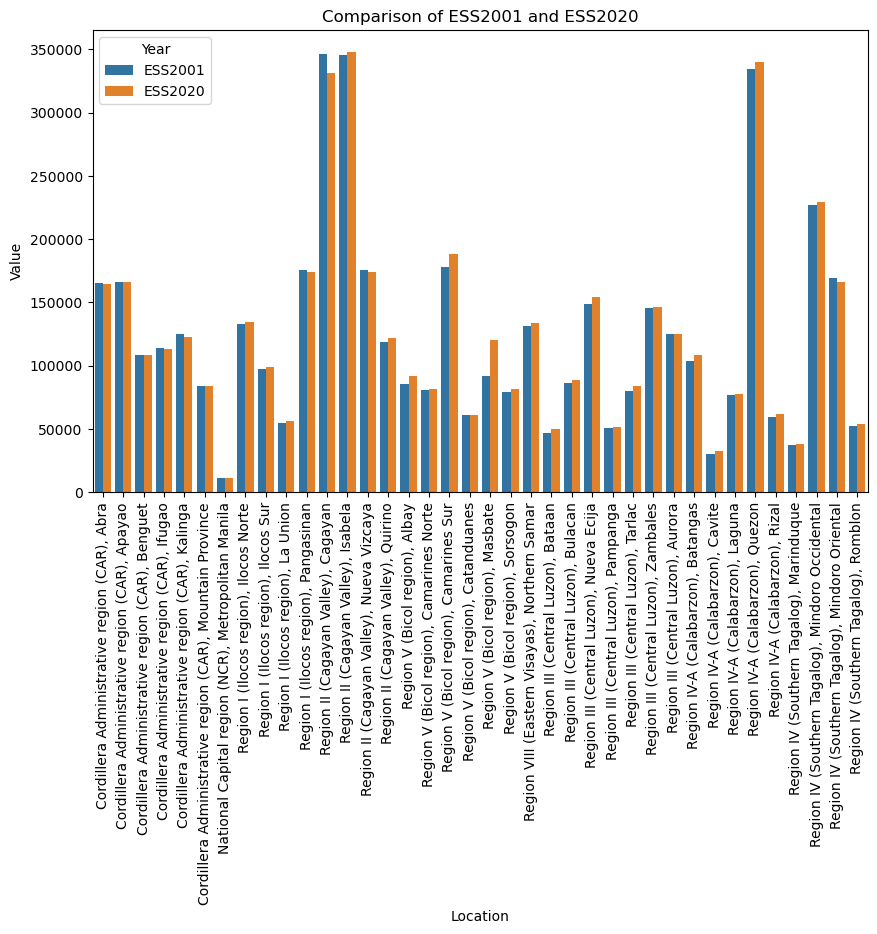

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame and df_ess is the DataFrame with ESS columns
# Get the first two columns from the original DataFrame
location_data = df.iloc[:, 0] + ', ' + df.iloc[:, 1]

# Create a DataFrame with 'ESS2001' and 'ESS2020' columns and location data
df_comparison = df_ess[['ESS2001', 'ESS2020']]
df_comparison['Location'] = location_data

# Melt the DataFrame to have 'ESS2001' and 'ESS2020' in the same column
df_melted = df_comparison.melt(id_vars='Location', var_name='Year', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Value', hue='Year', data=df_melted)
plt.title('Comparison of ESS2001 and ESS2020')
plt.xlabel('Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

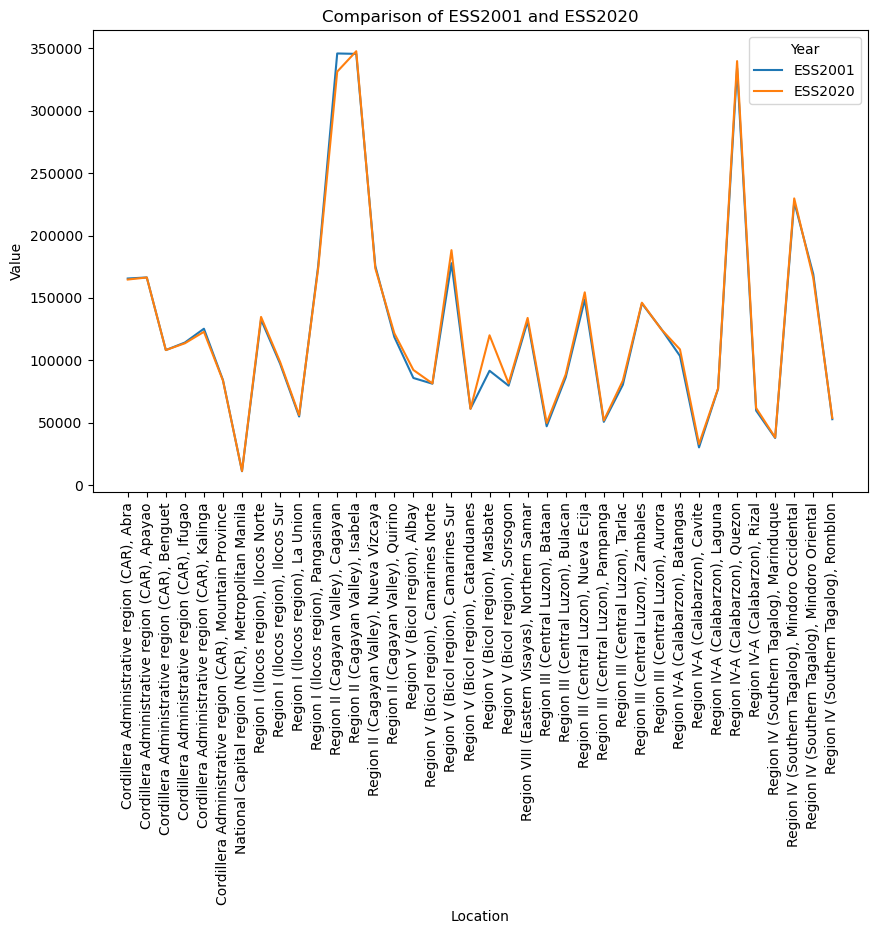

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Location', y='Value', hue='Year', data=df_melted)
plt.title('Comparison of ESS2001 and ESS2020')
plt.xlabel('Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

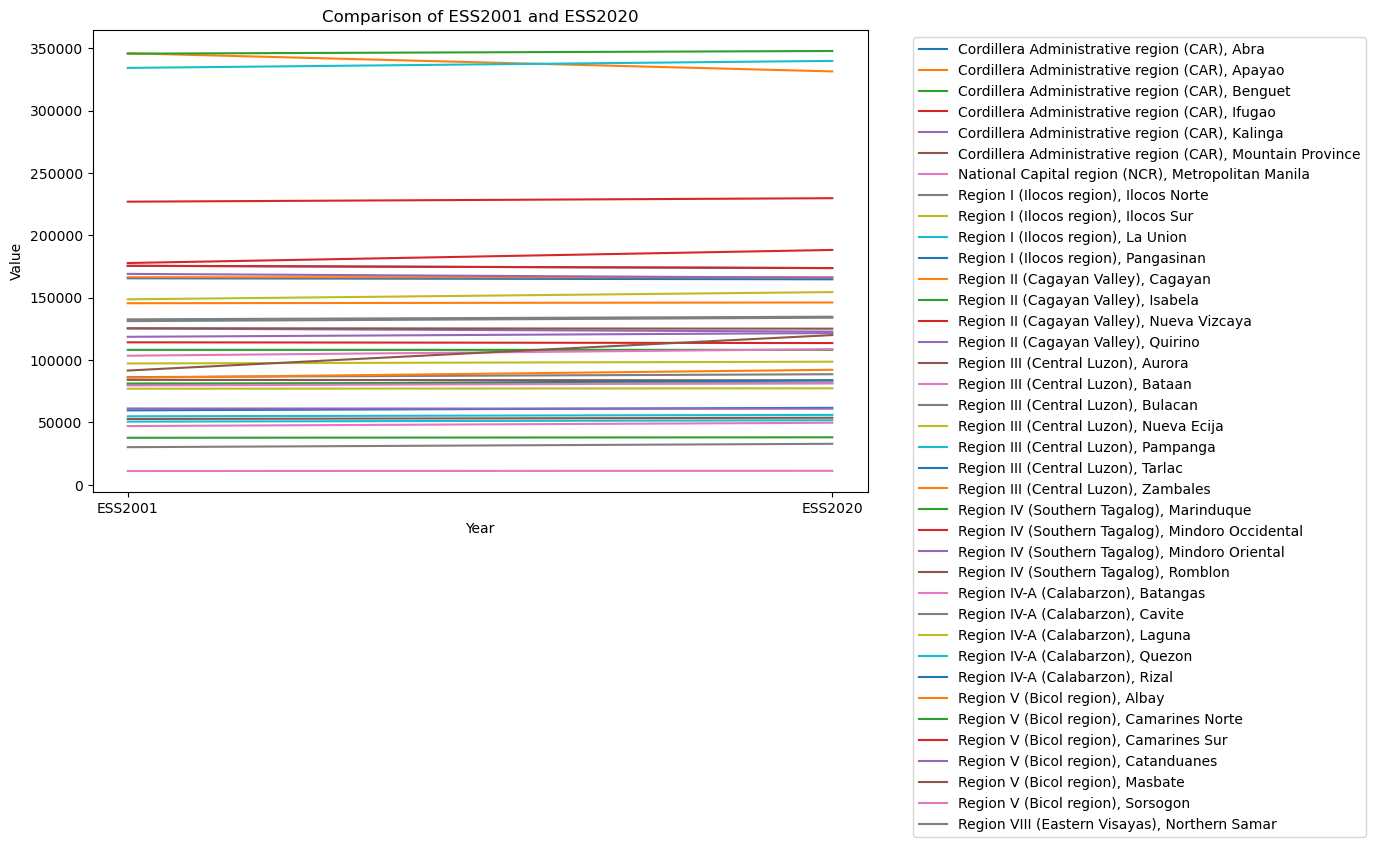

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame so that each location is a column
df_pivot = df_melted.pivot(index='Year', columns='Location', values='Value')

plt.figure(figsize=(10, 6))

# Plot each column
for column in df_pivot.columns:
    sns.lineplot(x=df_pivot.index, y=df_pivot[column], label=column)

plt.title('Comparison of ESS2001 and ESS2020')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

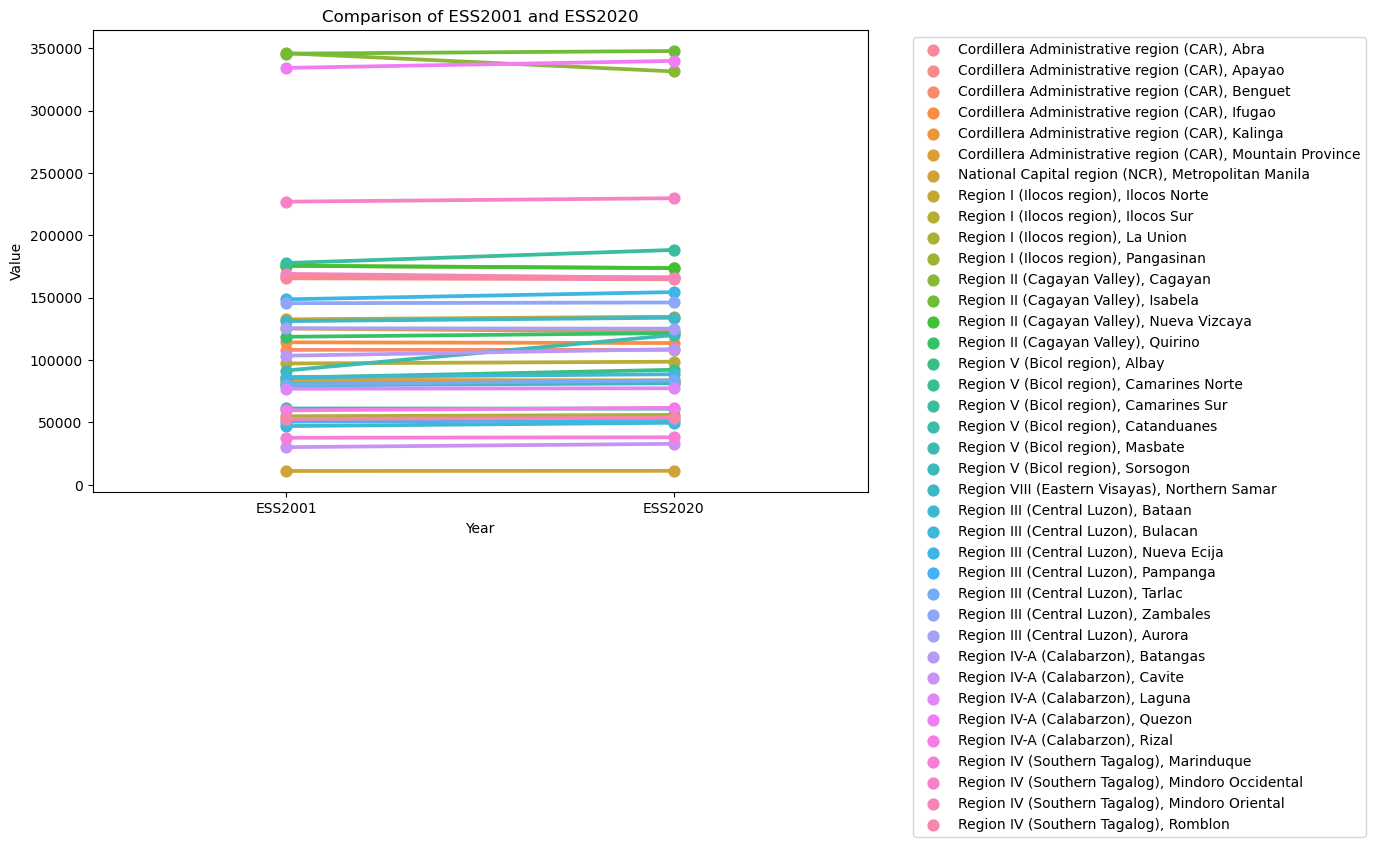

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_melted is your DataFrame with 'Location', 'Year' and 'Value' columns
plt.figure(figsize=(10, 6))

sns.pointplot(x='Year', y='Value', hue='Location', data=df_melted, join=True)

plt.title('Comparison of ESS2001 and ESS2020')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

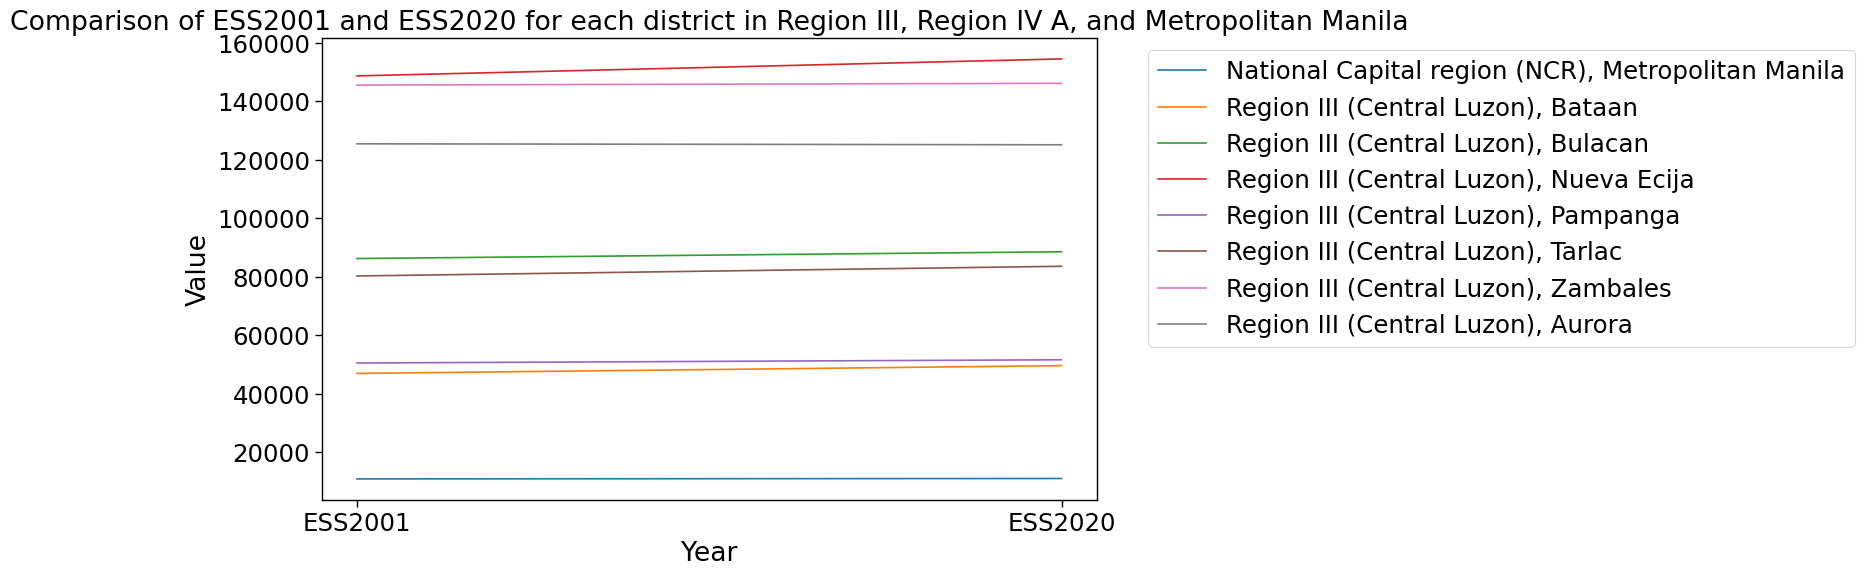

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

# Filter df_melted to include only rows where the 'Location' column contains 'Region III', 'Region IV A' or 'Metropolitan Manila'
df_filtered = df_melted[df_melted['Location'].str.contains('Region III|Region IV A|Metropolitan Manila')]

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='Location', data=df_filtered)

plt.title('Comparison of ESS2001 and ESS2020 for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

KeyError: 'x'

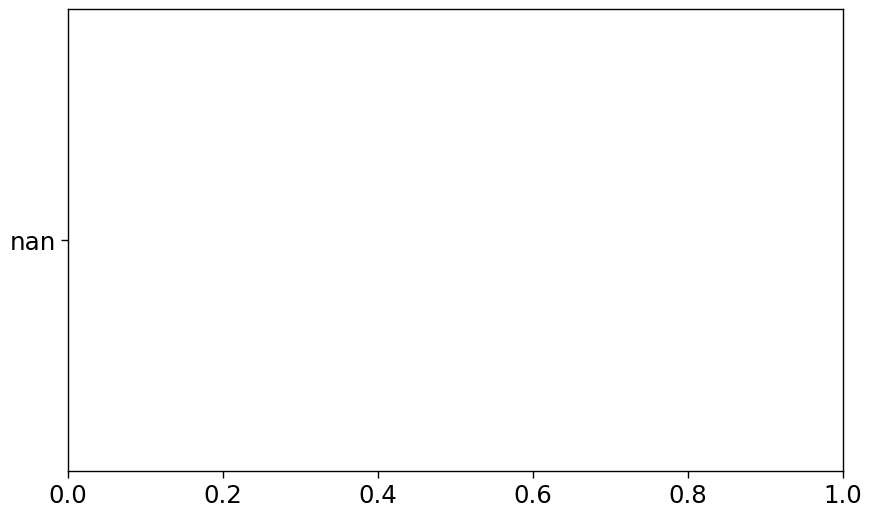

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

# Filter df_melted to include only rows where the 'Region' column contains 'Region III', 'Region IV A' or 'Metropolitan Manila'
df_filtered = df_melted[df_melted['Parent Region'].str.contains('Region III|Region IV A|Metropolitan Manila')]

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='District', data=df_filtered)

plt.title('Comparison of ESS2001 and ESS2020 for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

In [28]:
df_melted = df[['Parent Region', 'District', 'ESS2001', 'ESS2020']]
df_melted.head(35)



,Parent Region,District,ESS2001,ESS2020
0,Cordillera Administrative region (CAR),Abra,165524.2,164700.9
1,Cordillera Administrative region (CAR),Apayao,166363.8,166319.5
2,Cordillera Administrative region (CAR),Benguet,108118.3,108130.3
3,Cordillera Administrative region (CAR),Ifugao,114170.9,113578.9
4,Cordillera Administrative region (CAR),Kalinga,125248.6,122777.5
5,Cordillera Administrative region (CAR),Mountain Province,84043.5,83678.9
6,National Capital region (NCR),Metropolitan Manila,10975.5,11117.5
7,Region I (Ilocos region),Ilocos Norte,132586.9,134700.7
8,Region I (Ilocos region),Ilocos Sur,97203.5,98618.5
9,Region I (Ilocos region),La Union,54833.2,55970.3


In [53]:
regions = ['Region III (Central Luzon)', 'Region IV-A (Calabarzon)', 'National Capital region (NCR)']
df_filtered = df[df['Parent Region'].isin(regions)]

df_melted = df_filtered.melt(id_vars=['Parent Region', 'District'], var_name='Year', value_name='Value')


<bound method NDFrame.head of                       Parent Region             District                Year  \
0     National Capital region (NCR)  Metropolitan Manila     2001_Grasslands   
1        Region III (Central Luzon)               Bataan     2001_Grasslands   
2        Region III (Central Luzon)              Bulacan     2001_Grasslands   
3        Region III (Central Luzon)          Nueva Ecija     2001_Grasslands   
4        Region III (Central Luzon)             Pampanga     2001_Grasslands   
...                             ...                  ...                 ...   
1464       Region IV-A (Calabarzon)             Batangas  ESS2020_Normalized   
1465       Region IV-A (Calabarzon)               Cavite  ESS2020_Normalized   
1466       Region IV-A (Calabarzon)               Laguna  ESS2020_Normalized   
1467       Region IV-A (Calabarzon)               Quezon  ESS2020_Normalized   
1468       Region IV-A (Calabarzon)                Rizal  ESS2020_Normalized   

         

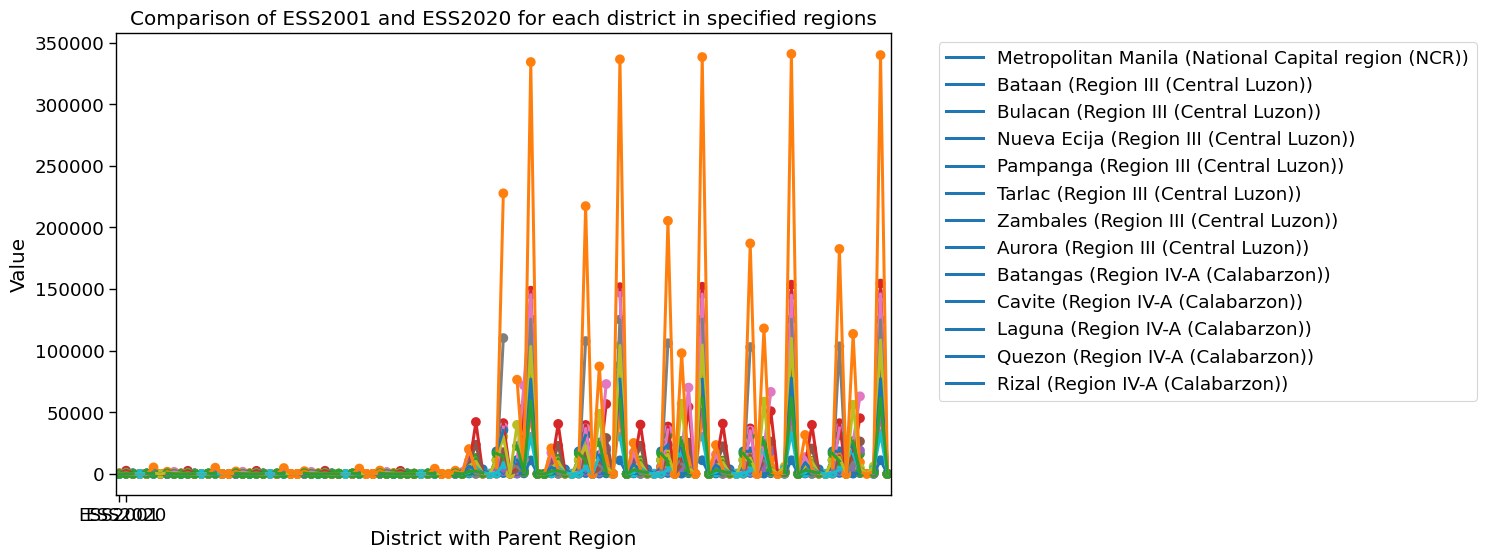

In [62]:
mport matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'District with Parent Region' that combines 'District' and 'Parent Region'
df_melted['District with Parent Region'] = df_melted['District'] + ' (' + df_melted['Parent Region'] + ')'

# Convert 'Value' column to numeric
df_melted['Value'] = pd.to_numeric(df_melted['Value'])

# Set the font scale to a larger size
sns.set_context("paper", font_scale=1.5)

plt.figure(figsize=(10, 6))

# Get the list of unique districts
districts = df_melted['District with Parent Region'].unique()

# Create a color palette with the same length as the number of unique districts
color_palette = sns.color_palette(n_colors=len(districts))

# Plot a line for each district
for district, color in zip(districts, color_palette):
    df_district = df_melted[df_melted['District with Parent Region'] == district]
    sns.pointplot(x='Year', y='Value', data=df_district, join=True, color=color)


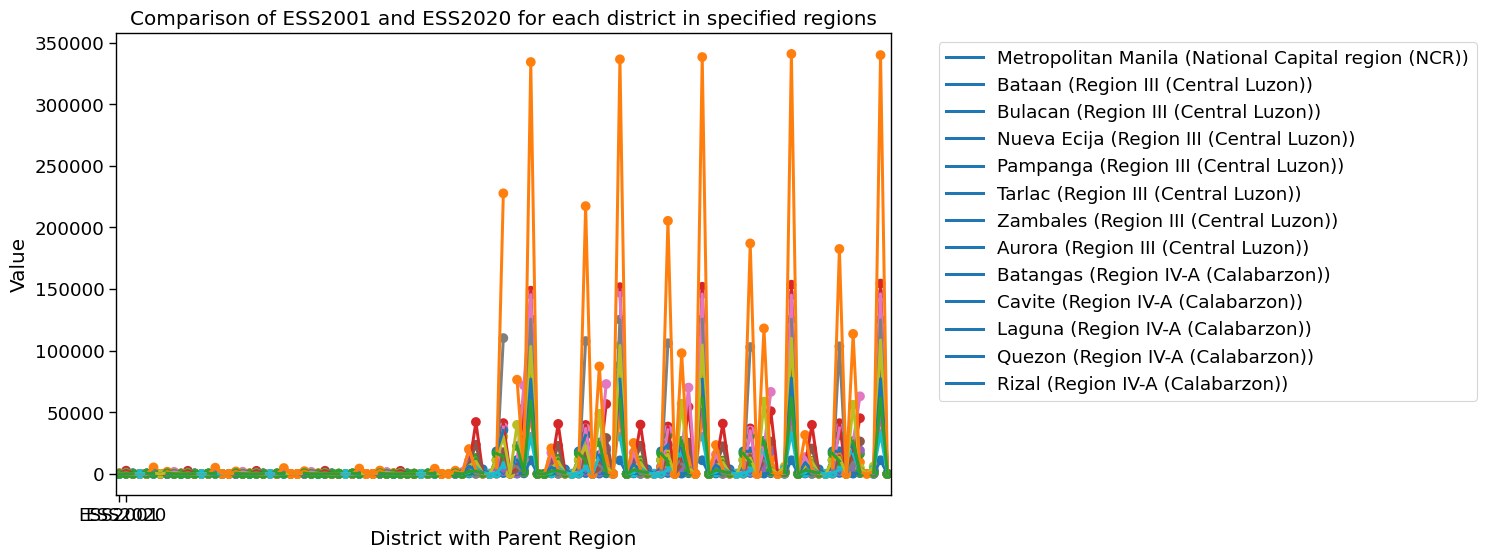

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'District with Parent Region' that combines 'District' and 'Parent Region'
df_melted['District with Parent Region'] = df_melted['District'] + ' (' + df_melted['Parent Region'] + ')'

# Convert 'Value' column to numeric
df_melted['Value'] = pd.to_numeric(df_melted['Value'])

# Remove duplicates based on 'District with Parent Region' and 'Year'
df_melted.drop_duplicates(subset=['District with Parent Region', 'Year'], keep='first', inplace=True)

# Set the font scale to a larger size
sns.set_context("paper", font_scale=1.5)

plt.figure(figsize=(10, 6))

# Get the list of unique districts
districts = df_melted['District with Parent Region'].unique()

# Create a color palette with the same length as the number of unique districts
color_palette = sns.color_palette(n_colors=len(districts))

# Plot a line for each district
for district, color in zip(districts, color_palette):
    df_district = df_melted[df_melted['District with Parent Region'] == district]
    sns.pointplot(x='Year', y='Value', data=df_district, join=True, color=color)

plt.title('Comparison of ESS2001 and ESS2020 for each district in specified regions')
plt.xlabel('District with Parent Region')
plt.ylabel('Value')
plt.xticks([0, 1], ['ESS2001', 'ESS2020'])  # Set x-axis labels to only show ESS2001 and ESS2020
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=districts)  # Place legend outside the plot
plt.show()

In [64]:
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

KeyError: 'x'

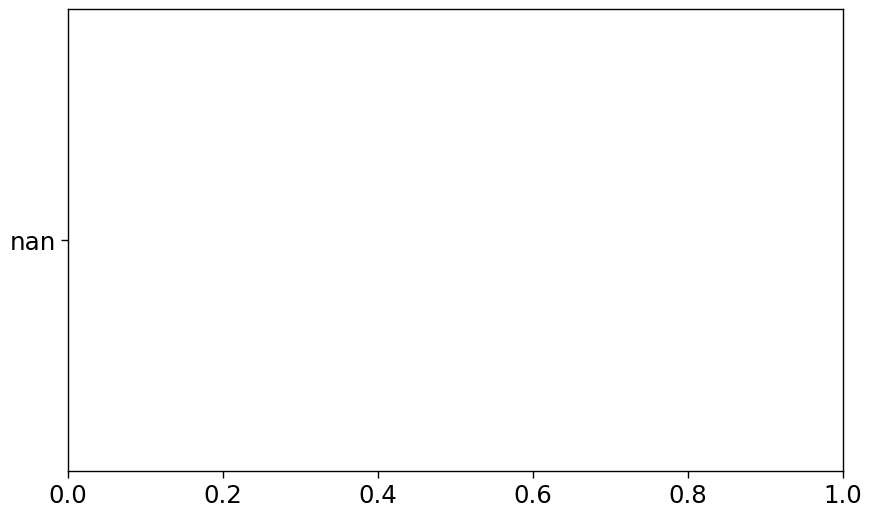

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrame
df_melted['Value'] = df_melted['Value'].astype(str)
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='District', data=df_melted)

plt.title('Comparison of ESS values for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


df_melted = pd.melt(df_filtered, id_vars=['Parent Region', 'District'], var_name='Year', value_name='Value')

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='District', data=df_melted)

plt.title('Comparison of ESS values for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

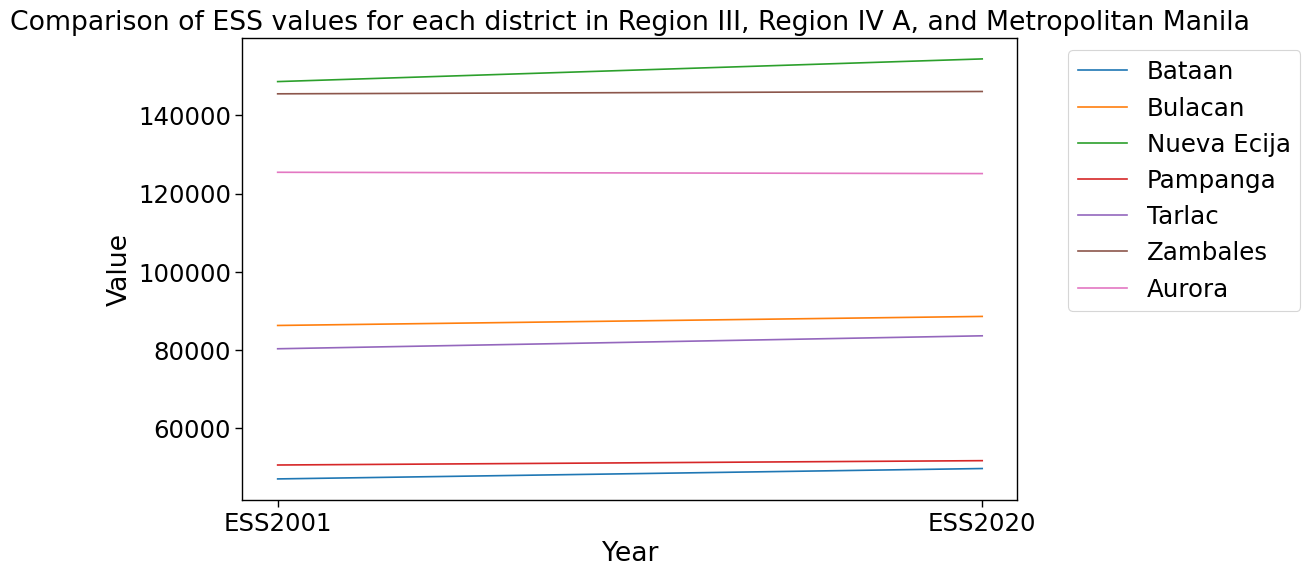

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrame
df_melted = pd.melt(df_filtered, id_vars=['Parent Region', 'District'], var_name='Year', value_name='Value')

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='District', data=df_melted)

plt.title('Comparison of ESS values for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font scale to a larger size
sns.set_context("paper", font_scale=2)

# Filter df_melted to include only rows where the 'Region' column contains 'Region III', 'Region IV A' or 'Metropolitan Manila'
df_filtered = df_melted[df_melted['Region'].str.contains('Region III|Region IV A|Metropolitan Manila')]

plt.figure(figsize=(10, 6))

# Plot each district as an individual line
sns.lineplot(x='Year', y='Value', hue='District', data=df_filtered)

plt.title('Comparison of ESS2001 and ESS2020 for each district in Region III, Region IV A, and Metropolitan Manila')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

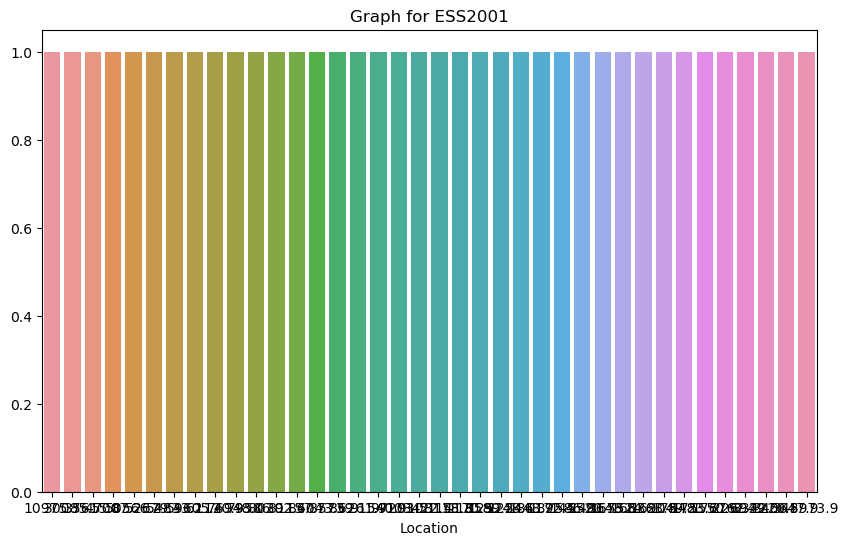

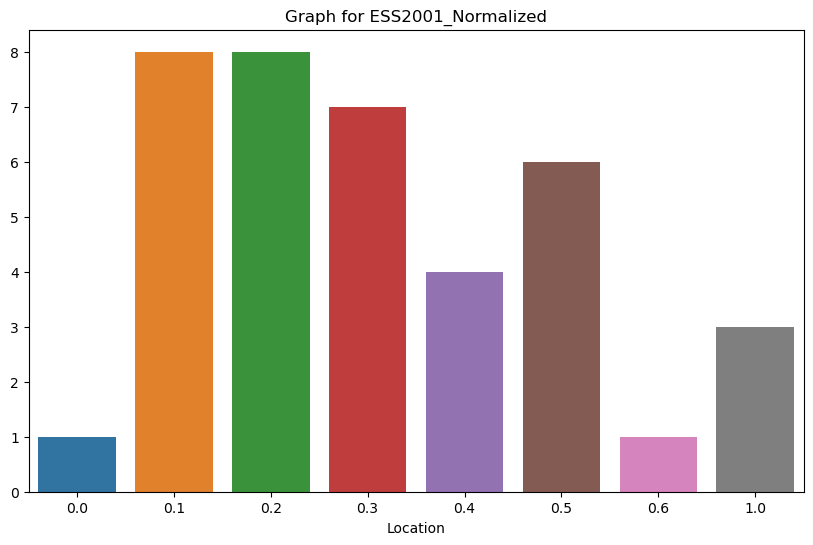

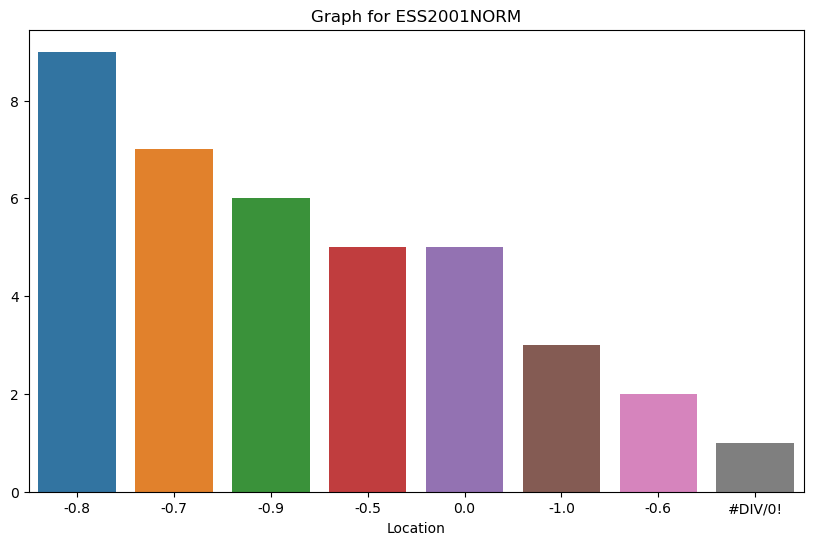

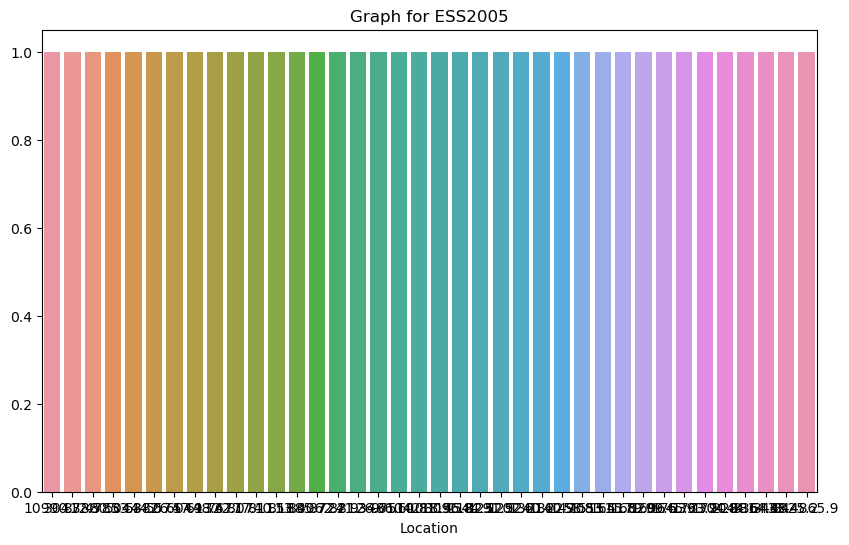

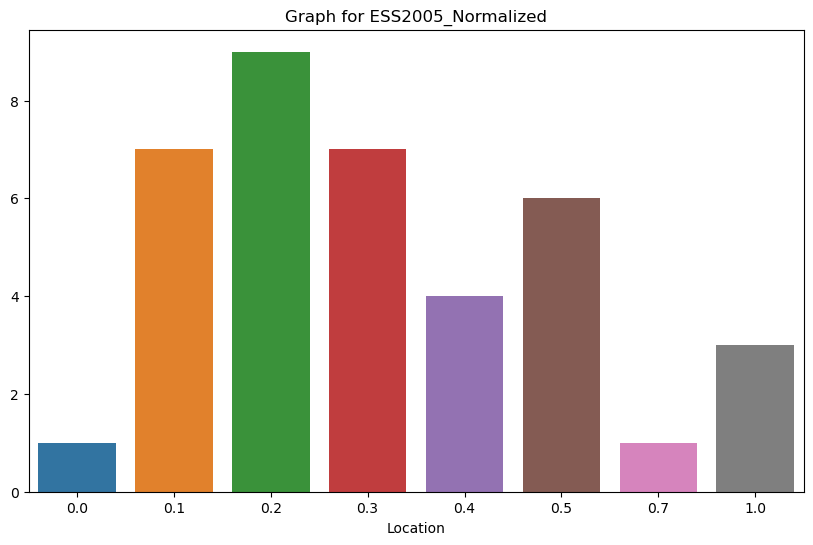

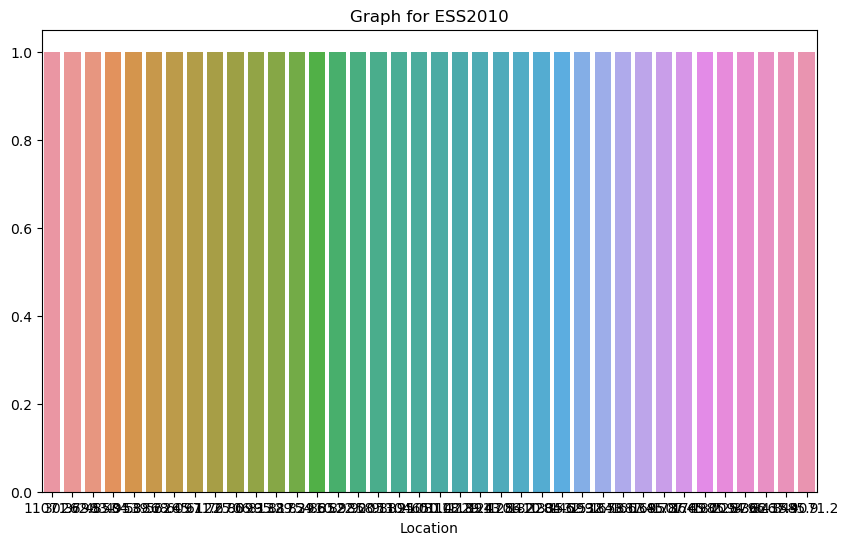

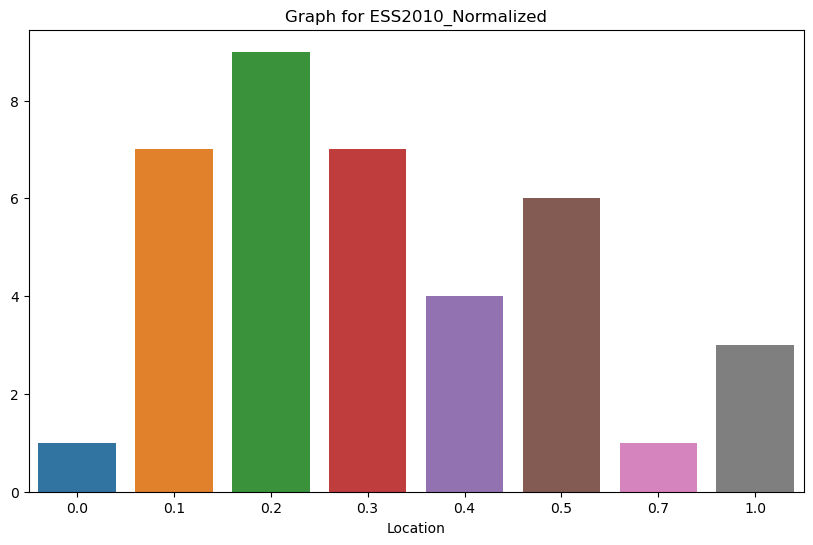

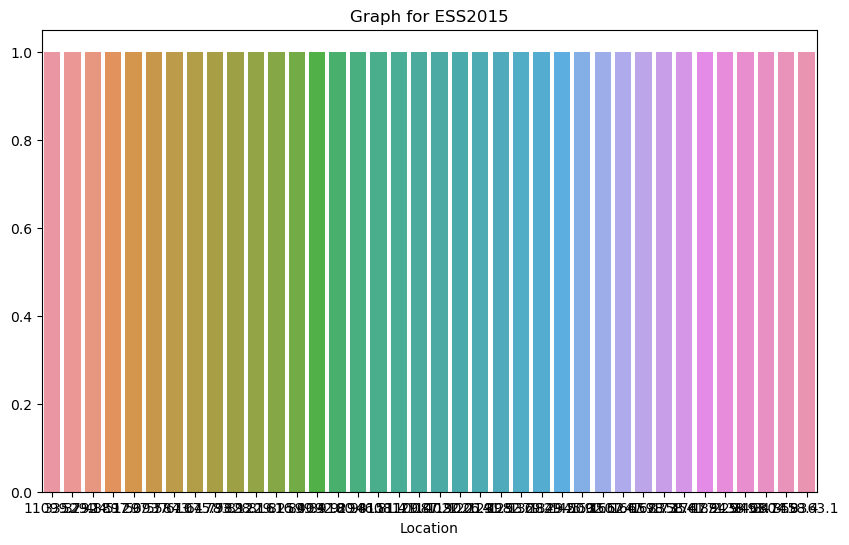

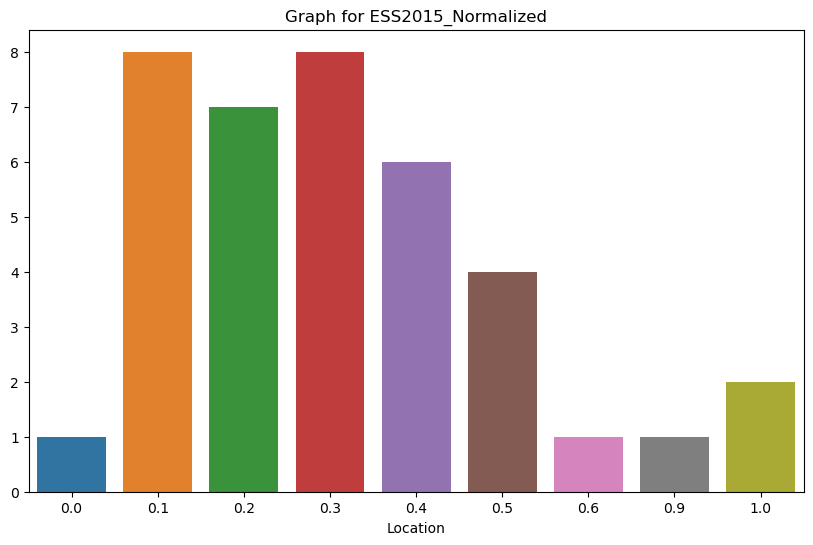

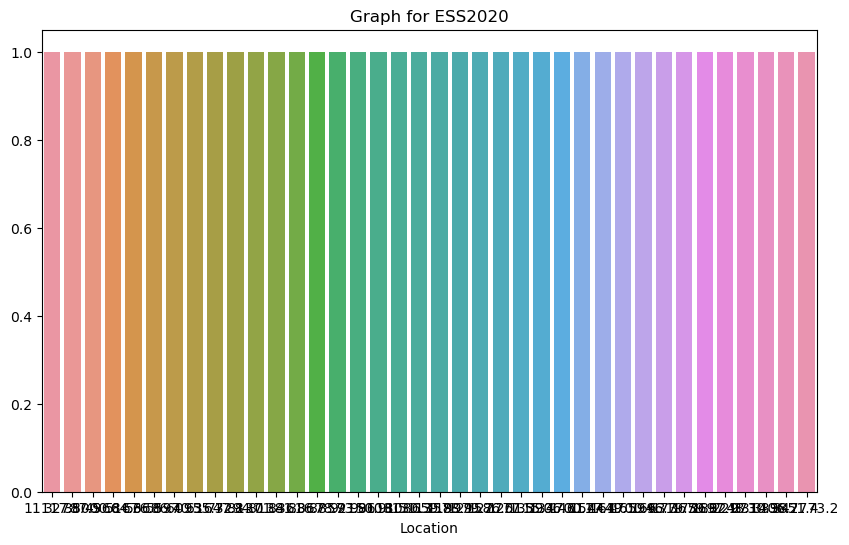

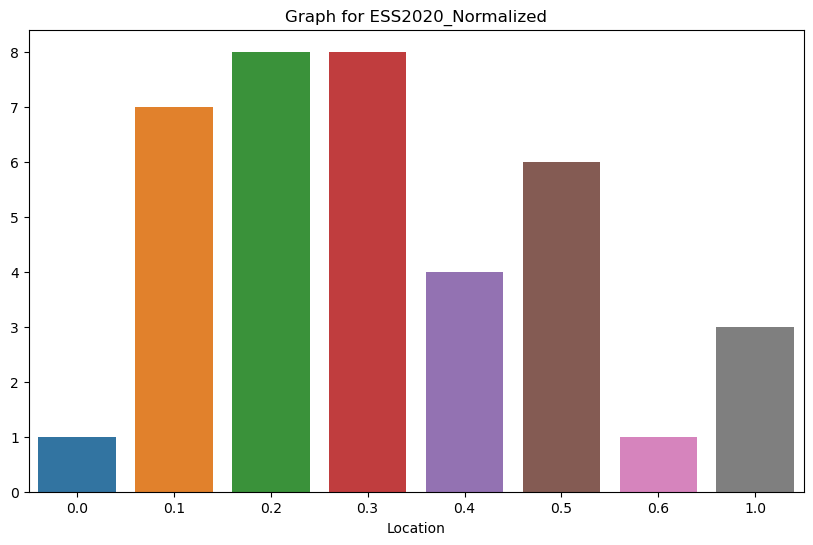

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame and df_ess is the DataFrame with ESS columns
# Get the first two columns from the original DataFrame
location_data = df.iloc[:, 0] + ', ' + df.iloc[:, 1]

for column in df_ess.columns:
    # Count the number of each category in the current column
    category_counts = df_ess[column].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f'Graph for {column}')
    plt.xlabel('Location')
    plt.show()

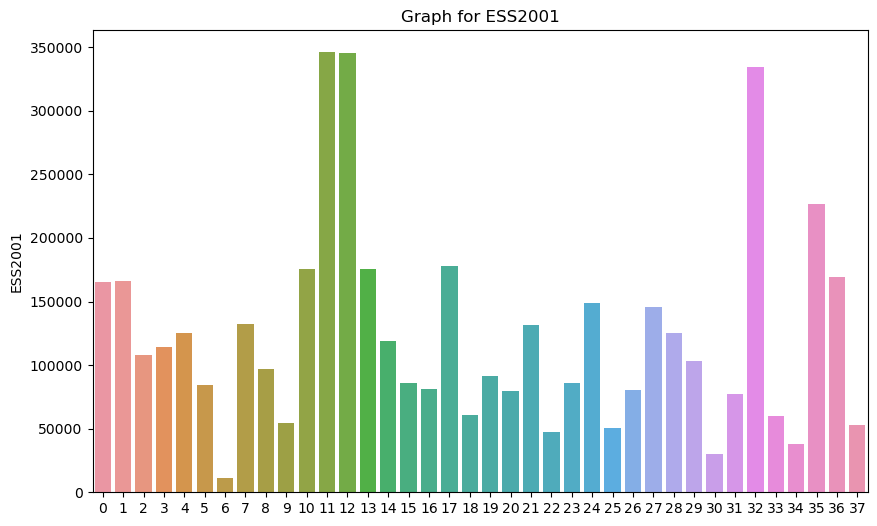

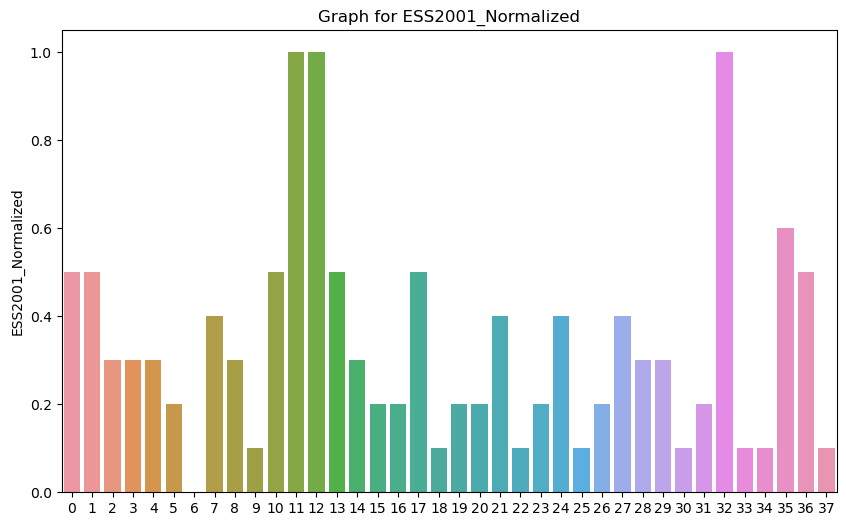

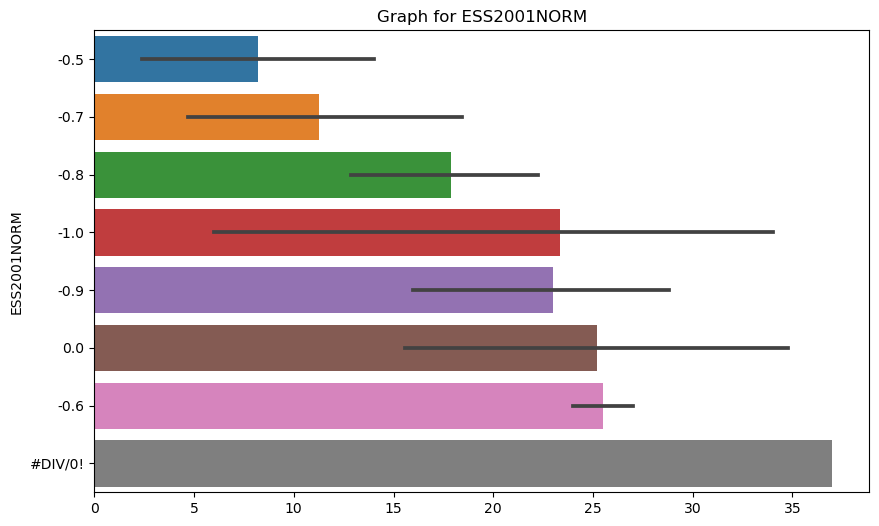

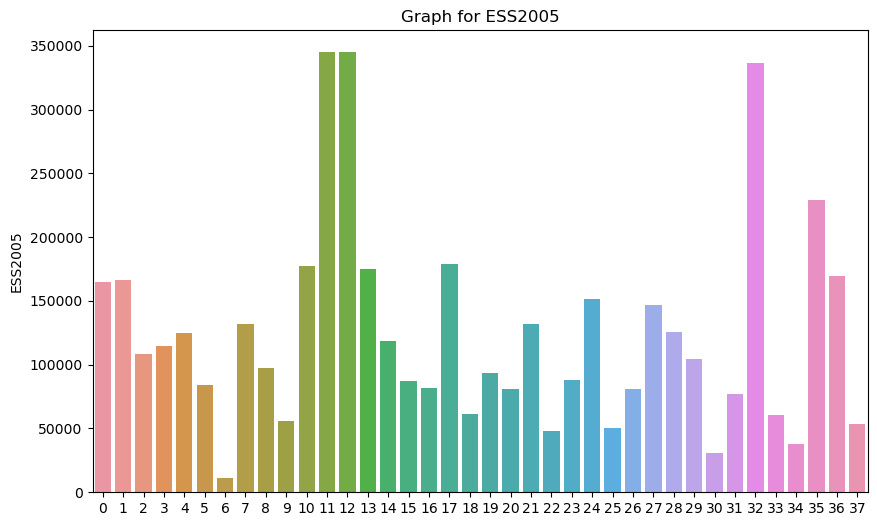

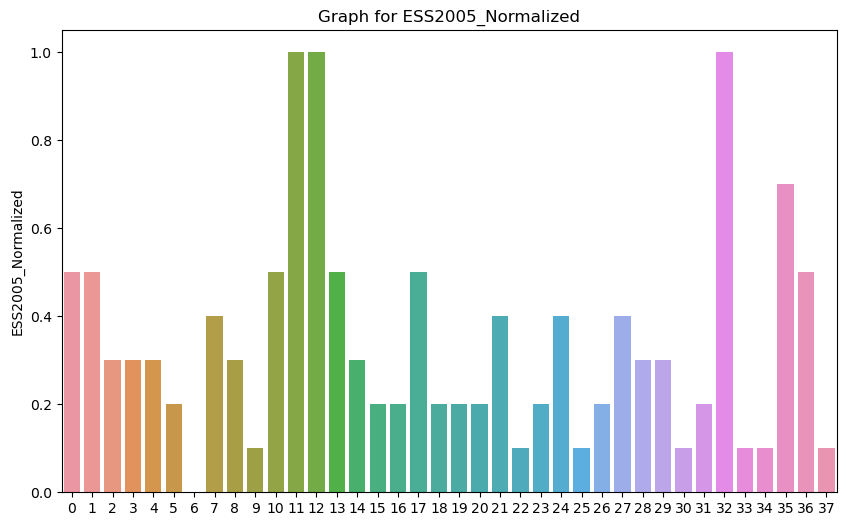

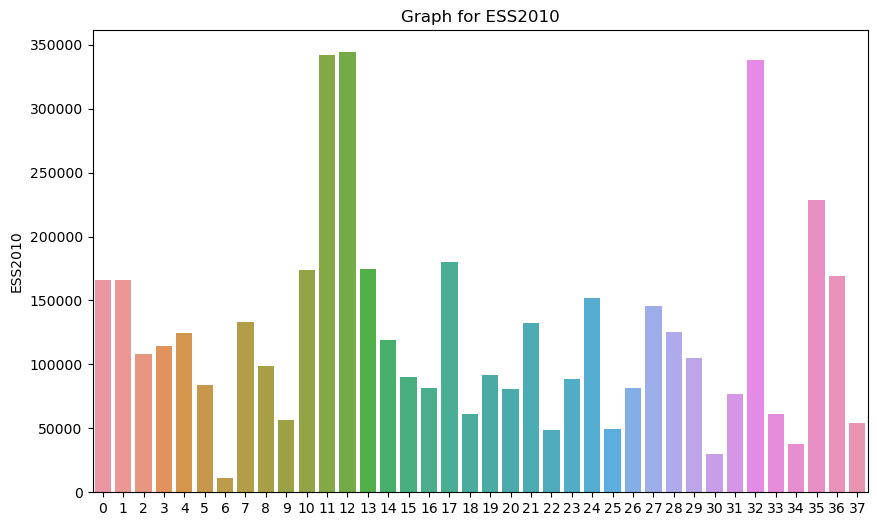

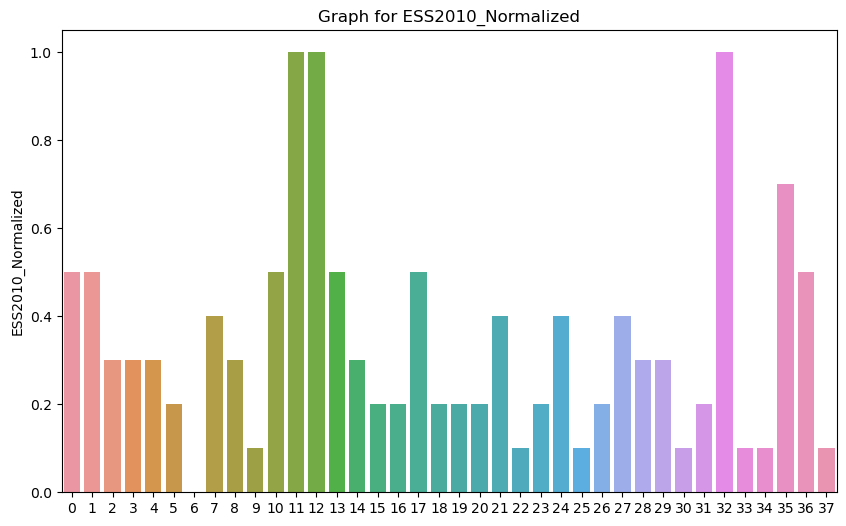

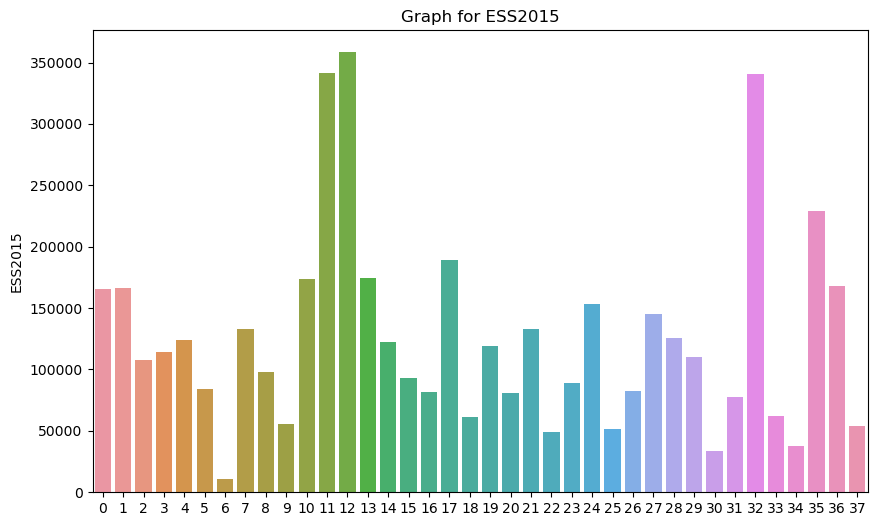

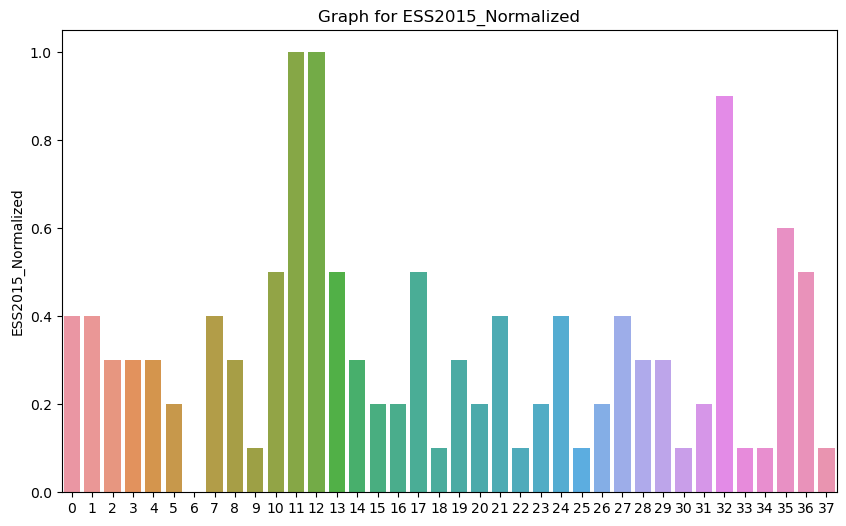

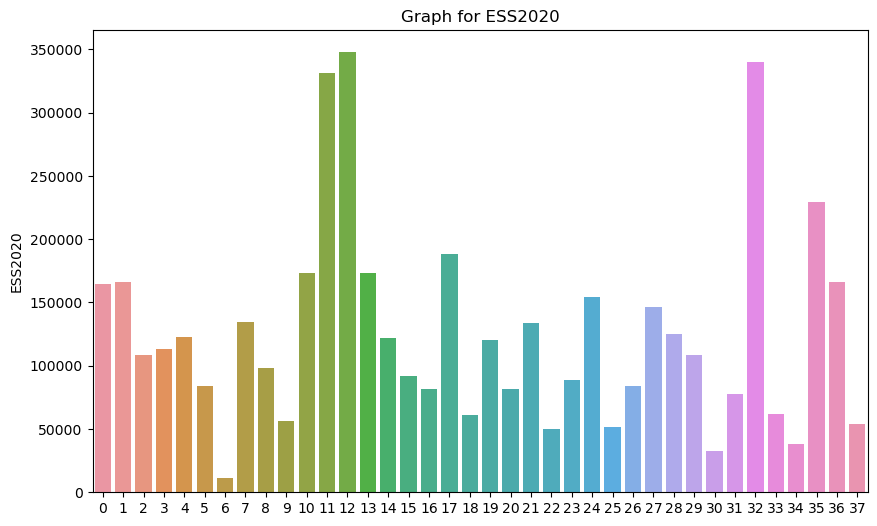

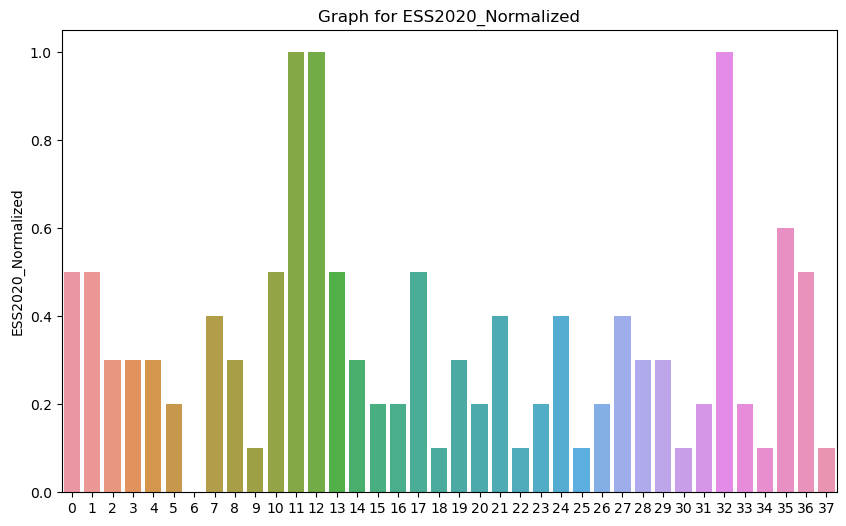

In [4]:
 matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_ess is your DataFrame
for columnimport in df_ess.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_ess.index, y=df_ess[column])
    plt.title(f'Graph for {column}')
    plt.show()

In [7]:
for column in df_ess.columns[2:]:  # Start from the 3rd column
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_ess['Parent Region'] + ', ' + df_ess['District'], y=df_ess[column])
    plt.title(f'Graph for {column}')
    plt.xlabel('Location')
    plt.show()

KeyError: 'Parent Region'

<Figure size 1000x600 with 0 Axes>

In [9]:
df_ess.head()

,ESS2001,ESS2001_Normalized,ESS2001NORM,ESS2005,ESS2005_Normalized,ESS2010,ESS2010_Normalized,ESS2015,ESS2015_Normalized,ESS2020,ESS2020_Normalized
0,165524.2,0.5,-0.5,165179.0,0.5,165887.8,0.5,165247.7,0.4,164700.9,0.5
1,166363.8,0.5,-0.5,166299.6,0.5,166345.8,0.5,166598.3,0.4,166319.5,0.5
2,108118.3,0.3,-0.7,108096.8,0.3,108118.3,0.3,108129.0,0.3,108130.3,0.3
3,114170.9,0.3,-0.7,114544.3,0.3,114229.4,0.3,114022.0,0.3,113578.9,0.3
4,125248.6,0.3,-0.7,125202.6,0.3,124706.2,0.3,123982.6,0.3,122777.5,0.3


In [33]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv")

# Define the column categorization dictionary
column_categories = {
    'Mixed Forests Landcover': ['Normalized_2001_Mixed Forests', 'Normalized_2005_Mixed Forests',
                                'Normalized_2010_Mixed Forests', 'Normalized_2015_Mixed Forests',
                                'Normalized_2020_Mixed Forests'],
    'Woody Savannas': ['Normalized_2001_Woody Savannas', 'Normalized_2005_Woody Savannas',
                       'Normalized_2010_Woody Savannas', 'Normalized_2015_Woody Savannas',
                       'Normalized_2020_Woody Savannas'],
    'Permanent Snow and Ice cover': ['Normalized_2001_Permanent Snow and Ice', 
                                     'Normalized_2020_Permanent Snow and Ice'],
    'Permanent Wetlands': ['Normalized_2001_Permanent Wetlands', 'Normalized_2005_Permanent Wetlands',
                           'Normalized_2010_Permanent Wetlands', 'Normalized_2015_Permanent Wetlands',
                           'Normalized_2020_Permanent Wetlands'],
    'Urban and Builtup Lands': ['Normalized_2001_Urban and Built-up Lands', 'Normalized_2005_Urban and Built-up Lands',
                                'Normalized_2010_Urban and Built-up Lands', 'Normalized_2015_Urban and Built-up Lands',
                                'Normalized_2020_Urban and Built-up Lands'],
    'Greenness (NDVI) Score': ['2000NDVI', '2020NDVI'],
    'Barren Land': ['Normalized_2001_Barren', 'Normalized_2005_Barren',
                    'Normalized_2010_Barren', 'Normalized_2015_Barren', 'Normalized_2020_Barren'],
    'Croplands Score': ['Normalized_2001_Croplands', 'Normalized_2005_Croplands',
                        'Normalized_2010_Croplands', 'Normalized_2015_Croplands', 'Normalized_2020_Croplands'],
    'Natural Vegetation': ['Normalized_2001_Cropland/Natural Vegetation Mosaics', 'Normalized_2005_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2010_Cropland/Natural Vegetation Mosaics', 'Normalized_2015_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2020_Cropland/Natural Vegetation Mosaics'],
    'Closed Shrublands': ['Normalized_2015_Closed Shrublands', 'Normalized_2020_Closed Shrublands'],
    'Grasslands Score': ['Normalized_2001_Grasslands', 'Normalized_2005_Grasslands',
                         'Normalized_2010_Grasslands', 'Normalized_2015_Grasslands', 'Normalized_2020_Grasslands']
}

## Select the columns to include in the modified DataFrame
selected_columns = ['Parent Region', 'District']
for category in column_categories.values():
    selected_columns.extend(category)

# Create the modified DataFrame
modified_df = data[selected_columns].copy()

# Multiply the values with their respective weights and create new columns
for category, columns in column_categories.items():
    if category in modified_df.columns:
        for column in columns:
            modified_df[f'{column} (Weighted)'] = modified_df[column] * es_weights[category]

# Handle missing values
for category, columns in column_categories.items():
    for column in columns[1:-1]:
        if modified_df[column].isnull().any():
            previous_value = modified_df[column].fillna(method='ffill')
            next_value = modified_df[column].fillna(method='bfill')
            mean_value = (previous_value + next_value) / 2
            modified_df[column].fillna(mean_value, inplace=True)

NameError: name 'data' is not defined

In [42]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv")

# Define the column categorization dictionary
column_categories = {
    'Mixed Forests Landcover': ['Normalized_2001_Mixed Forests', 'Normalized_2005_Mixed Forests',
                                'Normalized_2010_Mixed Forests', 'Normalized_2015_Mixed Forests',
                                'Normalized_2020_Mixed Forests'],
    'Woody Savannas': ['Normalized_2001_Woody Savannas', 'Normalized_2005_Woody Savannas',
                       'Normalized_2010_Woody Savannas', 'Normalized_2015_Woody Savannas',
                       'Normalized_2020_Woody Savannas'],
    'Permanent Snow and Ice cover': ['Normalized_2001_Permanent Snow and Ice' 
                                     ],
    'Permanent Wetlands': ['Normalized_2001_Permanent Wetlands', 'Normalized_2005_Permanent Wetlands',
                           'Normalized_2010_Permanent Wetlands', 'Normalized_2015_Permanent Wetlands',
                           'Normalized_2020_Permanent Wetlands'],
    'Urban and Builtup Lands': ['Normalized_2001_Urban and Built-up Lands', 'Normalized_2005_Urban and Built-up Lands',
                                'Normalized_2010_Urban and Built-up Lands', 'Normalized_2015_Urban and Built-up Lands',
                                'Normalized_2020_Urban and Built-up Lands'],
    'Greenness (NDVI) Score': ['2000NDVI'],
    'Barren Land': ['Normalized_2001_Barren', 'Normalized_2005_Barren',
                    'Normalized_2010_Barren', 'Normalized_2015_Barren', 'Normalized_2020_Barren'],
    'Croplands Score': ['Normalized_2001_Croplands', 'Normalized_2005_Croplands',
                        'Normalized_2010_Croplands', 'Normalized_2015_Croplands', 'Normalized_2020_Croplands'],
    'Natural Vegetation': ['Normalized_2001_Cropland/Natural Vegetation Mosaics', 'Normalized_2005_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2010_Cropland/Natural Vegetation Mosaics', 'Normalized_2015_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2020_Cropland/Natural Vegetation Mosaics'],
    'Closed Shrublands': ['Normalized_2015_Closed Shrublands', 'Normalized_2020_Closed Shrublands'],
    'Grasslands Score': ['Normalized_2001_Grasslands', 'Normalized_2005_Grasslands',
                         'Normalized_2010_Grasslands', 'Normalized_2015_Grasslands', 'Normalized_2020_Grasslands']
}

# Ecosystem service scores
es_scores = {
    'Mixed Forests': 80,
    'Woody Savannas': 76,
    'Permanent Snow and Ice': 24,
    'Permanent Wetlands': 78,
    'Urban and Builtup Lands': 67,
    'Greenness (NDVI) Score': 80,
    'Water Bodies': 78,
    'Barren Land': 68,
    'Closed Shrublands': 87,
    'Natural Vegetation': 91,
    'Croplands': 57,
    'Grasslands': 73,
    'Barren': 67
}

# Select the columns to include in the modified DataFrame
selected_columns = ['Parent Region', 'District']
for category in column_categories.values():
    selected_columns.extend(category)

# Create the modified DataFrame
modified_df = df[selected_columns].copy()

# Multiply the values with their respective weights and create new columns
for category, columns in column_categories.items():
    if category in modified_df.columns:
        for column in columns:
            modified_df[f'Weighted {column} (Weighted)'] = modified_df[column] * es_weights[category]

# Handle missing values
for category, columns in column_categories.items():
    for column in columns[1:-1]:
        if modified_df[column].isnull().any():
            previous_value = modified_df[column].fillna(method='ffill')
            next_value = modified_df[column].fillna(method='bfill')
            mean_value = (previous_value + next_value) / 2
            modified_df[column].fillna(mean_value, inplace=True)

In [2]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv")

# Define the column categorization dictionary
column_categories = {
    'Mixed Forests Landcover': ['Normalized_2001_Mixed Forests', 'Normalized_2005_Mixed Forests',
                                'Normalized_2010_Mixed Forests', 'Normalized_2015_Mixed Forests',
                                'Normalized_2020_Mixed Forests'],
    'Woody Savannas': ['Normalized_2001_Woody Savannas', 'Normalized_2005_Woody Savannas',
                       'Normalized_2010_Woody Savannas', 'Normalized_2015_Woody Savannas',
                       'Normalized_2020_Woody Savannas'],
    'Permanent Snow and Ice cover': ['Normalized_2001_Permanent Snow and Ice' 
                                     ],
    'Permanent Wetlands': ['Normalized_2001_Permanent Wetlands', 'Normalized_2005_Permanent Wetlands',
                           'Normalized_2010_Permanent Wetlands', 'Normalized_2015_Permanent Wetlands',
                           'Normalized_2020_Permanent Wetlands'],
    'Urban and Builtup Lands': ['Normalized_2001_Urban and Built-up Lands', 'Normalized_2005_Urban and Built-up Lands',
                                'Normalized_2010_Urban and Built-up Lands', 'Normalized_2015_Urban and Built-up Lands',
                                'Normalized_2020_Urban and Built-up Lands'],
    'Greenness (NDVI) Score': ['2000NDVI'],
    'Barren Land': ['Normalized_2001_Barren', 'Normalized_2005_Barren',
                    'Normalized_2010_Barren', 'Normalized_2015_Barren', 'Normalized_2020_Barren'],
    'Croplands Score': ['Normalized_2001_Croplands', 'Normalized_2005_Croplands',
                        'Normalized_2010_Croplands', 'Normalized_2015_Croplands', 'Normalized_2020_Croplands'],
    'Natural Vegetation': ['Normalized_2001_Cropland/Natural Vegetation Mosaics', 'Normalized_2005_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2010_Cropland/Natural Vegetation Mosaics', 'Normalized_2015_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2020_Cropland/Natural Vegetation Mosaics'],
    'Closed Shrublands': ['Normalized_2015_Closed Shrublands', 'Normalized_2020_Closed Shrublands'],
    'Grasslands Score': ['Normalized_2001_Grasslands', 'Normalized_2005_Grasslands',
                         'Normalized_2010_Grasslands', 'Normalized_2015_Grasslands', 'Normalized_2020_Grasslands']
}

# Ecosystem service scores
es_scores = {
    'Mixed Forests': 80,
    'Woody Savannas': 76,
    'Permanent Snow and Ice': 24,
    'Permanent Wetlands': 78,
    'Urban and Builtup Lands': 67,
    'Greenness (NDVI) Score': 80,
    'Water Bodies': 78,
    'Barren Land': 68,
    'Closed Shrublands': 87,
    'Natural Vegetation': 91,
    'Croplands': 57,
    'Grasslands': 73,
    'Barren': 67
}

# Select the columns to include in the modified DataFrame
selected_columns = ['Parent Region', 'District']
for category in column_categories.values():
    selected_columns.extend(category)

# Create the modified DataFrame
modified_df = df[selected_columns].copy()

# Multiply the values with their respective weights and create new columns
for category, columns in column_categories.items():
    if category in modified_df.columns:
        for column in columns:
            modified_df[f'{column} (Weighted)'] = modified_df[column] * es_scores[category]

# Handle missing values
for category, columns in column_categories.items():
    for column in columns[1:-1]:
        if modified_df[column].isnull().any():
            previous_value = modified_df[column].fillna(method='ffill')
            next_value = modified_df[column].fillna(method='bfill')
            mean_value = (previous_value + next_value) / 2
            modified_df[column].fillna(mean_value, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv'

In [61]:
modified_df.head()
modified_df.to_csv('/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/Scores.csv')


In [46]:
modified_df.columns


Index(['Parent Region', 'District', 'Normalized_2001_Mixed Forests',
       'Normalized_2005_Mixed Forests', 'Normalized_2010_Mixed Forests',
       'Normalized_2015_Mixed Forests', 'Normalized_2020_Mixed Forests',
       'Normalized_2001_Woody Savannas', 'Normalized_2005_Woody Savannas',
       'Normalized_2010_Woody Savannas', 'Normalized_2015_Woody Savannas',
       'Normalized_2020_Woody Savannas',
       'Normalized_2001_Permanent Snow and Ice',
       'Normalized_2001_Permanent Wetlands',
       'Normalized_2005_Permanent Wetlands',
       'Normalized_2010_Permanent Wetlands',
       'Normalized_2015_Permanent Wetlands',
       'Normalized_2020_Permanent Wetlands',
       'Normalized_2001_Urban and Built-up Lands',
       'Normalized_2005_Urban and Built-up Lands',
       'Normalized_2010_Urban and Built-up Lands',
       'Normalized_2015_Urban and Built-up Lands',
       'Normalized_2020_Urban and Built-up Lands', '2000NDVI',
       'Normalized_2001_Barren', 'Normalized_2005_Bar

In [55]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("/Users/rishi/OneDrive - Michigan State University/4Chapter3Data/2EcosystemMatrix_Normalized-1.csv")

# Define the column categorization dictionary
column_categories = {
    'Mixed Forests Landcover': ['Normalized_2001_Mixed Forests', 
                                 'Normalized_2015_Mixed Forests',
                                'Normalized_2020_Mixed Forests'],
    'Woody Savannas': ['Normalized_2001_Woody Savannas', 'Normalized_2005_Woody Savannas',
                       'Normalized_2010_Woody Savannas', 'Normalized_2015_Woody Savannas',
                       'Normalized_2020_Woody Savannas'],
    'Permanent Snow and Ice cover': ['Normalized_2001_Permanent Snow and Ice' 
                                     ],
    'Permanent Wetlands': ['Normalized_2001_Permanent Wetlands', 'Normalized_2005_Permanent Wetlands',
                           'Normalized_2010_Permanent Wetlands', 'Normalized_2015_Permanent Wetlands',
                           'Normalized_2020_Permanent Wetlands'],
    'Urban and Builtup Lands': ['Normalized_2001_Urban and Built-up Lands', 'Normalized_2005_Urban and Built-up Lands',
                                'Normalized_2010_Urban and Built-up Lands', 'Normalized_2015_Urban and Built-up Lands',
                                'Normalized_2020_Urban and Built-up Lands'],
    'Greenness (NDVI) Score': ['2000NDVI'],
    'Barren Land': ['Normalized_2001_Barren', 'Normalized_2005_Barren',
                    'Normalized_2010_Barren', 'Normalized_2015_Barren', 'Normalized_2020_Barren'],
    'Croplands Score': ['Normalized_2001_Croplands', 'Normalized_2005_Croplands',
                        'Normalized_2010_Croplands', 'Normalized_2015_Croplands', 'Normalized_2020_Croplands'],
    'Natural Vegetation': ['Normalized_2001_Cropland/Natural Vegetation Mosaics', 'Normalized_2005_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2010_Cropland/Natural Vegetation Mosaics', 'Normalized_2015_Cropland/Natural Vegetation Mosaics',
                           'Normalized_2020_Cropland/Natural Vegetation Mosaics'],
    'Closed Shrublands': ['Normalized_2015_Closed Shrublands', 'Normalized_2020_Closed Shrublands'],
    'Grasslands Score': ['Normalized_2001_Grasslands', 'Normalized_2005_Grasslands',
                         'Normalized_2010_Grasslands', 'Normalized_2015_Grasslands', 'Normalized_2020_Grasslands']
}

# Ecosystem service scores
es_scores = {
    'Mixed Forests': 80,
    'Woody Savannas': 76,
    'Permanent Snow and Ice': 24,
    'Permanent Wetlands': 78,
    'Urban and Builtup Lands': 67,
    'Greenness (NDVI) Score': 80,
    'Water Bodies': 78,
    'Barren Land': 68,
    'Closed Shrublands': 87,
    'Natural Vegetation': 91,
    'Croplands': 57,
    'Grasslands': 73,
    'Barren': 67
}

# Select the columns to include in the modified DataFrame
selected_columns = ['Parent Region', 'District']
weighted_columns = []

# Create the modified DataFrame
modified_df = df[selected_columns].copy()

# Multiply the values with their respective weights and create new columns
for category, columns in column_categories.items():
    if category in modified_df.columns:
        for column in columns:
            weighted_column_name = f'{column} (Weighted)'
            modified_df[weighted_column_name] = modified_df[column] * es_scores[category]
            weighted_columns.append(weighted_column_name)

# Reorder the columns

# Handle missing values
for category, columns in column_categories.items():
    for column in columns[1:-1]:
        if modified_df[column].isnull().any():
            previous_value = modified_df[column].fillna(method='ffill')
            next_value = modified_df


KeyError: 'Normalized_2015_Mixed Forests'